In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
class LogisticRegression:
    
    def __init__(self, n_iterations, learning_rate=0.01, threshold=0.5, lambd=1.0):
        self.lr = learning_rate
        self.n_iter = n_iterations
        self.pred_thresh = threshold
        self.lambd = lambd        #regularization parameter
        self.costs = None
        self.w = None
        self.b = None
        
    
    def _init_params(self, n_features):
        '''
        This function creates a vector of zeros of shape (n_features, 1) for w and initializes b to 0
        '''
        self.w = np.zeros((n_features, 1))
        self.b = 0.
    
    
    def _sigmoid(self, z):
        '''
        This function calculates the sigmoid of z
        '''
        return 1 / (1 + np.exp(-z))
    
    
    def _calc_cost(self, X, y):
        '''
        This function computes cross-entropy cost function
        X.shape: (n_samples, n_features)
        y.shape: (n_samples, 1)
        '''
        m = X.shape[0]
        Z = np.dot(X, self.w) + self.b
        A = self._sigmoid(Z)
        cost = (self.lambd / 2 * np.linalg.norm(self.w)**2 - np.sum(y*np.log(A) + (1-y)*np.log(1-A))) / m
        return cost, A
    
    
    def fit(self, X, y):
        '''
        This function optimizes w and b by running a gradient descent algorithm
        X.shape: (n_samples, n_features)
        y.shape: (n_samples, 1)
        '''
        self._init_params(X.shape[1])
        self.costs = []
        m = X.shape[0]
        
        for i in range(self.n_iter):
            cost, A = self._calc_cost(X, y)
            
            dw = np.dot(X.T, A - y) / m     #gradient of cost function with respect to w
            db = np.sum(A - y) / m          #gradient of cost function with respect to b
            
            self.w *= 1 - self.lr * self.lambd / m    #so-called 'weight decay'
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            if i%100 == 0:
                self.costs.append(cost)
        
    
    def predict(self, X):
        '''
        Predict whether the label is 0 or 1 using learned logistic regression parameters w, b and some threshold
        X.shape: (n_samples, n_features)
        '''
        Z = np.dot(X, self.w) + self.b
        A = self._sigmoid(Z)
        y_pred = (A > self.pred_thresh).astype(int)
        return y_pred

In [3]:
#generate data
np.random.seed(17)
samples = np.random.randn(200, 2)
labels = (samples.sum(axis=1) > 0).astype(int).reshape(200, 1)

In [4]:
#explore labels distribution
np.unique(labels, return_counts=True)

(array([0, 1]), array([102,  98]))

In [5]:
#function to print accuracy and plot learned decision boundary
def decision_boundary_accuracy(model, data, target, grid_size=0.01, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size, random_state=17)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Accuracy on train data: {accuracy_score(y_train, y_train_pred)}')
    print(f'Accuracy on test data: {accuracy_score(y_test, y_test_pred)}')
    
    x1_min, x1_max = data[:,0].min() - 1, data[:,0].max() + 1
    x2_min, x2_max = data[:,1].min() - 1, data[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, grid_size), 
                           np.arange(x2_min, x2_max, grid_size), indexing='ij')
    
    z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx1, xx2, z, cmap='magma')
    sns.scatterplot(data[:, 0], data[:, 1], hue=target.ravel(), style=target.ravel(), palette='winter', 
                                                    alpha=.8, size=1, sizes=(100, 200))
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Decision Boundary')
    plt.tight_layout()

Accuracy on train data: 0.9850746268656716
Accuracy on test data: 0.9242424242424242


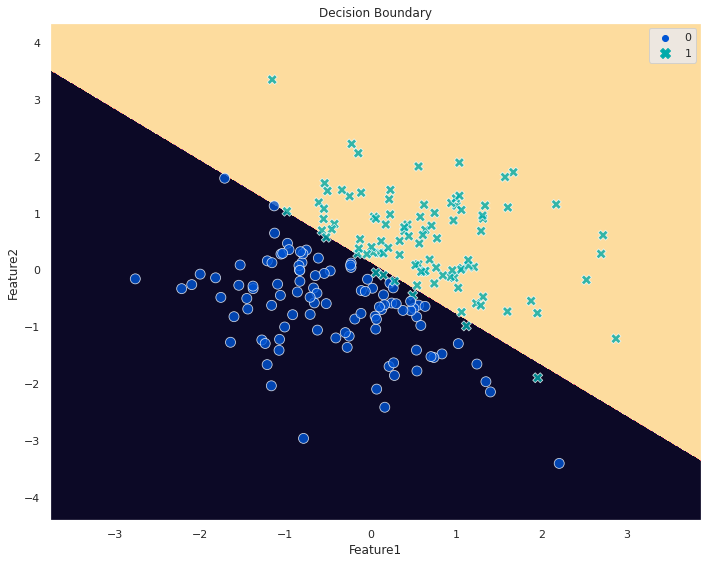

In [6]:
#train model, plot decision boundary and print accuracy on train/test sets
clf = LogisticRegression(n_iterations=2000, learning_rate=0.005, lambd=1e+2)
decision_boundary_accuracy(clf, samples, labels)

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


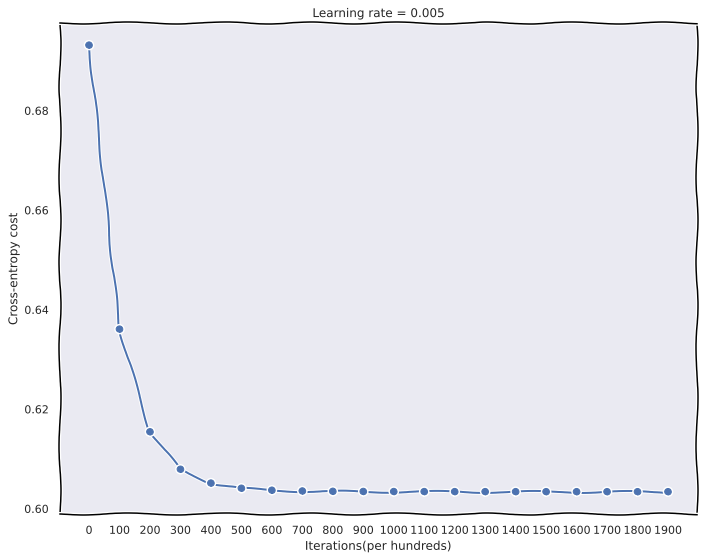

In [7]:
#plot learning curve
costs = clf.costs
lr = clf.lr
plt.figure(figsize=(10, 8))
with plt.xkcd():
    plt.plot(range(len(costs)), costs, marker='o')
    plt.xticks(ticks=range(len(costs)), labels=np.arange(0, len(costs)*100, 100))
    plt.xlabel('Iterations(per hundreds)')
    plt.ylabel('Cross-entropy cost')
    plt.title(f'Learning rate = {lr}')
    plt.tight_layout()